# Predicting inclinations from magnetic maps using convolutional neural networks (CNNs)

Hello, everyone! Welcome to your last lab exericse for this class. In this lab, you are going to train a predictor that can predict the inclinations of the magnetization of a source body in the subsurface, given a magnetic data map. You are going to use Keras to achieve it. <br>
<br>
Upon finishing this lab, you will be able to  <br>
1. understand the workflow of training a CNN; <br>
2. use Keras to train a CNN and make predictions. <br>
<br>

Author: Jiajia Sun @ University of Houston, 04/25/2019

## 1. Import Packages

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation
from keras.utils import to_categorical

import matplotlib.pyplot as plt 
import tensorflow as tf

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 2. Load Data

In [2]:
X = np.load("XMagneticDataMaps.npy", "r")
Y = np.load("YMagneticDataMaps.npy", "r")
IncDict = np.load("InclinationDictionary.npy", "r")
Inc = {}
for i in range(len(IncDict)):
    Inc[IncDict[i,0]] = IncDict[i,1]

#normalize
X = X/np.max(X)

    
def cat_to_inc(Y):
    return(Inc[str(int(Y))])

In [3]:
IncDict.shape

(18, 2)

In [3]:
X.shape

(4140, 29, 29, 1)

Note that **X** contains 4140 magnetic data maps, each of which is a 29 X 29 map. And **Y** contains 4140 labels, each of which corresponds to one data map in **X**.

## 3. Visualize Data

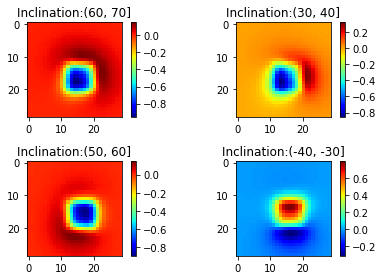

In [4]:
randnum = np.random.randint(0,4140,4)
for i in np.arange(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X[randnum[i]].reshape((29,29)), cmap = 'jet')
    plt.colorbar()
    plt.title("Inclination:" + cat_to_inc(Y[randnum[i]]))
plt.tight_layout()      
plt.show()

## 4. Prepare training, validation and test data

In [5]:
X_train = X[0:int(len(X)*0.6)]
X_val = X[int(len(X)*0.6):int(len(X)*0.6) + int(len(X)*0.2)]
X_test = X[int(len(X)*0.6) + int(len(X)*0.2): -1]

Y_train = to_categorical(Y[0:int(len(X)*0.6)])
Y_val = to_categorical(Y[int(len(X)*0.6):int(len(X)*0.6) + int(len(X)*0.2)])
Y_test = to_categorical(Y[int(len(X)*0.6) + int(len(X)*0.2): -1])

The <font color=red>**training data**</font> and the corresponding labels are, respectively, <font color=blue>**X_train**</font> and <font color=blue>**Y_train**</font>. <br>
The <font color=red>**validation data**</font> and the corresponding labels are, respectively, <font color=blue>**X_val**</font> and <font color=blue>**Y_val**</font>. <br>
The <font color=red>**test data**</font> and the corresponding labels are, respectively, <font color=blue>**X_test**</font> and <font color=blue>**Y_test**</font>.

## 5. Build your CNNs

<font color = red>**Task 1:**</font> Create your own CNN architectures <font color = red>**(60 points)**</font> <br>
<br>
**HINT:** If you forget how to do it, please refer to the accompanying notework entitled 'Week11_Keras_example_CNNs.ipynb'.<br>
<br>
**NOTE:** For this lab, the dimension of each magnetic data image is <font color =red>**29 X 29**</font>, instead of 28 X 28. Also, there are a total of <font color=red>**18**</font> categories to predict, instead of 10.   

In [6]:
# Answer to Task 1






## 6. Train your CNNs

<font color = red>**Task 2:**</font> Write down the code for training the CNN you just created, on the right side of the equal sign. <font color = red>**(20 points)**</font> <br>
<br>
**HINT:** If you forget how to do it, please refer to the accompanying notework entitled 'Week11_Keras_example_CNNs.ipynb'.

In [ ]:
# Task 2: train your CNN (on the right hand side of the equal sign)
history = 

## 7. Check the accuracies

In [ ]:
loss, acc = model.evaluate(X_test, Y_test)

print("Training Accuracy:", round(history.history['acc'][-1]*100, 3), "%")
print("Validation Accuracy:", round(history.history['val_acc'][-1]*100,3), "%")
print("Test Accuracy:", round(acc*100,3), "%")

**NOTE:** Your test accuracy should <font color=blue>**not be less than 98%**</font>. If it is lower than 98%, you need to go back to Section 5 and try a different CNN architecture, or a different optimizer, or try increasing the number of epochs.

## 8. Make predictions

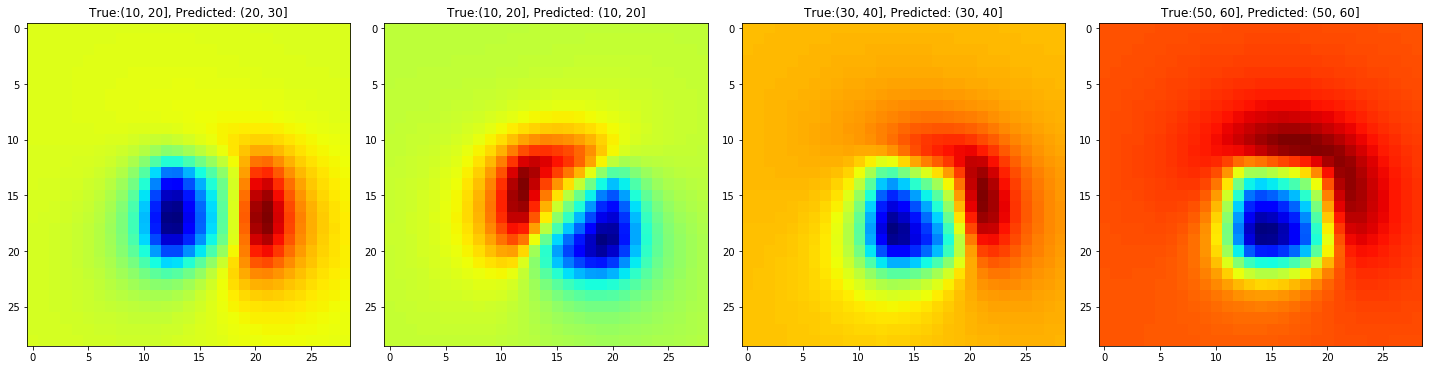

In [9]:
n = 420
Xpred = X_test[n:n+4]
Ytrue = Y_test[n:n+4]
Ypred = model.predict(Xpred)
plt.figure(figsize=(20,20))


for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(Xpred[i].reshape(29,29), cmap="jet")
    plt.title("True:" + cat_to_inc(np.argmax(Ytrue[i])) + ", Predicted: " + cat_to_inc(np.argmax(Ypred[i])))

plt.tight_layout()
plt.show()

## 9. Applications to CNNs to geoscience

<font color = red>**Task 3:**</font> Do a literature search and look for at least **two** examples where CNNs are used to solve some geoscience-related problems. Then, report the source of the information (e.g., URL, DOI, etc.), and summarize the studies using a few sentences. <font color = red> **(20 points)**</font>

## Acknowledgments
I would like to thank Felicia Nurindrawati for help create this lab exercise. Felicia is currently a graduate student working with Dr. Jiajia Sun in the Department of Earth and Atmospheric Sciences at the University of Houston. <br>

<img src = "poto.png" width="300">

## Congratulations! You have now become one of those people who have the capability of training CNNs using Keras!